enter the subjectneck tshirt
                                               Tweets
0   PROTECT HER Power Fist Crew Neck Unisex White ...
1   RT @BeHappy67465114: women‘s clothing summer m...
2   women‘s clothing summer models color printing ...
3   RT @FLai1234: Round N Round V Neck T Shirt htt...
4   💥Locryz Women's Summer Twist Knot Tshirt Dress...
5   Time and Tru V Neck Long Sleeve Semi Fitted #T...
6   Time and Tru Scoop Neck Elbow Length Sleeve Co...
7   RT @FLai1234: Round N Round V Neck T Shirt htt...
8   #Mossimo Supply Co. Short Sleeve V Neck #Tee #...
9   Tshirt Pax Lux Fashion https://t.co/JJAfsWGEPu...
10  Check out Myrtle Beach South Carolina Caribbea...
11  Mens Plain Basic Cotton VNeck V-Neck V Neck To...
12  Get amazing deals on byplay T-shirt in just on...
13  @Naje__ they got a tshirt out of me today, I a...
14  3D Cat Graphic Tee Cute Funny Animal Printed C...
15  Mens Basic Plain Cotton V-Neck VNeck Shirt Tee...
16  Aranoy Women Summer Casual Tshirt Dresses Beac...

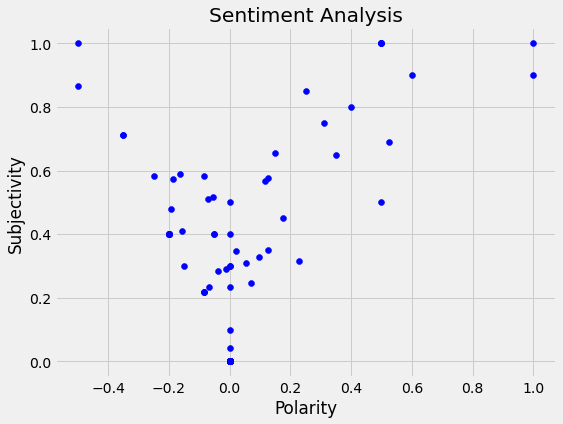

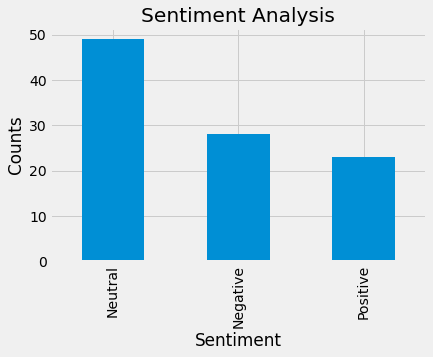

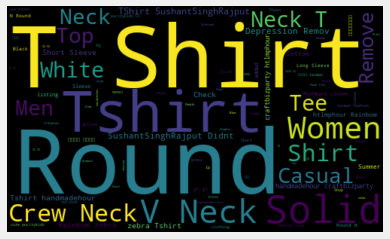

In [5]:
import tweepy
# import smtplib
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
from wordcloud import WordCloud
import pandas as pd
import smtplib
from email.message import  EmailMessage


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

text1 = input("enter the subject")
tweet_data = api_connect.search_tweets(text1,count=100)
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
print(df)
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantxt)
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
# function to get analysis
def getAnalysis(x): #polarity
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# plot the graph between Subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

#plotting of wordcloud
wrds=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(wrds)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()
df.to_csv('sentimental_analysis.csv', header=False, index=False)

In [6]:
wrds

'PROTECT HER Power Fist Crew Neck Unisex White Tshirt  maxidresses melaninfashion…  : women‘s clothing summer models color printing round neck short-sleeved shirt t-shirt women \n&gt;&gt;  women‘s clothing summer models color printing round neck short-sleeved shirt t-shirt women \n&gt;&gt;…  : Round N Round V Neck T Shirt  💥Locryz Women\'s Summer Twist Knot Tshirt Dresses Casual V Neck Short Sl\n🛒\n❌$14.99\n✅-\n🔔 ...  Time and Tru V Neck Long Sleeve Semi Fitted Tee Shirt Navy Cove Blue Misses Women\'s Junior\'s Size Large 12-14…  Time and Tru Scoop Neck Elbow Length Sleeve Coral Salmon and White Floral Print Stretch Cotton Tee Shirt Misses…  : Round N Round V Neck T Shirt  Mossimo Supply Co. Short Sleeve V Neck Tee Shirt Heathered Aqua Blue Green Misses Women\'s Junior\'s Size Large…  Tshirt Pax Lux Fashion  tshirts clothingstore branding bestselling Europe fashion…  Check out Myrtle Beach South Carolina Caribbean Joe Men\'s XL Beige Crew Neck T-shirt   eBay…  Mens Plain Basic Cotton V

In [24]:
dff=pd.read_csv('tshirts_csv_final.csv')
dff.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,9.0,http://flipkart.com/helmont-color-block-men-ho...,9.0,"Color Block Men Hooded Neck Red, Black T-Shirt",4.0,301659.0,35479.0,nice nyc material 👌 awesome dress and good qua...,2.2165,0.303391
1,81.0,http://flipkart.com/fastcolors-solid-men-round...,81.0,Solid Men Round Neck Brown T-Shirt,4.0,163245.0,18182.0,looking good nice nice dress,1.2834,0.136050
2,159.0,http://flipkart.com/roden-striped-men-round-ne...,159.0,Striped Men Round Neck Yellow T-Shirt,4.0,78734.0,8405.0,best h nice t shart i really like it is too ...,3.2104,0.088638
3,362.0,http://flipkart.com/allen-solly-solid-men-polo...,362.0,Solid Men Polo Neck Green T-Shirt,4.2,86977.0,8030.0,nice good one amazing product in perfect prize,2.5303,0.086743
4,374.0,http://flipkart.com/fastcolors-solid-men-round...,374.0,Solid Men Round Neck Multicolor T-Shirt,3.9,70993.0,8765.0,nice one👌 nice product i impressed perfect,2.6213,0.076833


In [25]:
dff=dff.dropna()
dff=dff.reset_index(drop=True)

In [26]:
dff.tail()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
201,303.0,http://flipkart.com/allen-solly-solid-men-polo...,303.0,Solid Men Polo Neck White T-Shirt,4.1,23.0,2.0,everything good very good nice,1.3023,0.000018
202,355.0,http://flipkart.com/van-heusen-academy-self-de...,355.0,Self Design Men Polo Neck Light Green T-Shirt,4.2,18.0,2.0,awesome t shirt fitting is good 😊 very nice,2.2052,0.000018
203,286.0,http://flipkart.com/metronaut-color-block-men-...,286.0,Color Block Men Polo Neck Multicolor T-Shirt,4.3,19.0,2.0,nice good,0.8619,0.000015
204,253.0,http://flipkart.com/u-s-polo-assn-solid-men-ne...,253.0,Solid Men Polo Neck Orange T-Shirt,4.3,22.0,1.0,its awesm,0.0000,0.000015
205,380.0,http://flipkart.com/jack-jones-printed-men-rou...,380.0,Printed Men Round Neck Black T-Shirt,3.8,20.0,1.0,looking sexy tishrit,0.5267,0.000013


In [27]:
a=""

In [28]:
for i in range(0,len(dff)):
    a=a+str(dff['desc'][i])

In [29]:
a

'Color Block Men Hooded Neck Red, Black T-ShirtSolid Men Round Neck Brown T-ShirtStriped Men Round Neck Yellow T-ShirtSolid Men Polo Neck Green T-ShirtSolid Men Round Neck Multicolor T-ShirtSolid Men Hooded Neck Black T-ShirtSolid Men Round Neck Black T-ShirtColor Block Men Round Neck Grey T-ShirtPack of 2 Color Block Men Round Neck Pink, Black T-ShirtStriped Men Round Neck Blue T-ShirtSolid Men V Neck Blue, Grey T-ShirtStriped Men Round Neck Maroon, Grey T-ShirtPrinted Men Hooded Neck Black T-ShirtSolid Men Mandarin Collar Brown, Black T-ShirtColor Block Men Round Neck Maroon, Beige T-ShirtPack of 3 Solid Men Round Neck Multicolor T-ShirtColor Block Men Round Neck Multicolor T-ShirtSolid Men Mandarin Collar Maroon T-ShirtPack of 3 Solid Men Round Neck Black, Dark Blue, Blue T-ShirtSolid Men Round Neck Green T-ShirtStriped Men Round Neck Yellow, Black T-ShirtColor Block Men Hooded Neck Multicolor T-ShirtPack of 2 Solid Men Round Neck Green, Black T-ShirtColor Block Men Round Neck Yello

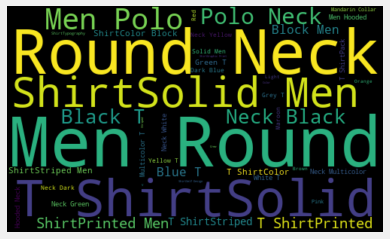

In [41]:
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(a)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

enter the subjectskirts
                                               Tweets
0   Solid Pleated Loose Skirt \n$37.99\nhttps://t....
1   @IgnorantCatsFan @ConspiracyBull1 Moreover, li...
2   There’s some titanic men wearing skirts and fl...
3   RT @otgyana: mini skirts are so fun it’s like ...
4   Solid Pleated Loose Skirt \n$37.99\nhttps://t....
5   @AileenMcHarg @davemcardle Absolutely. Kilts/t...
6   Oh, Tonga obviously heard about the Brum weath...
7   RT @EtheringtonBros: LONG SKIRTS from the #how...
8   RT @overine19: #xiaoven \nKnife and dagger\n\n...
9   RT @HiroshiVtuber: #迪奥文化挪用抗议 #Dior抄袭\nChinese ...
10  RT @HiroshiVtuber: #迪奥文化挪用抗议 #Dior抄袭\nChinese ...
11  skirts should be the size of a belt https://t....
12  @it_sonia_ Short skirts bana......they be like...
13  straight men wearing skirts… i won’t be impres...
14  RT @gulbiskundze: Why couldn’t school issued u...
15  @gulbiskundze @kim_siever I'm with you on this...
16  RT @HiroshiVtuber: #迪奥文化挪用抗议 #Dior抄袭\nChinese ...
17  

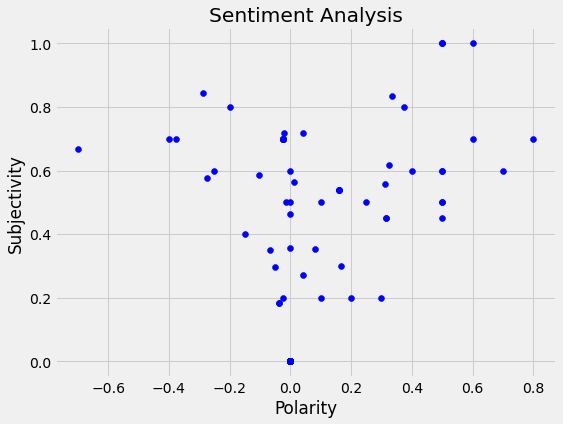

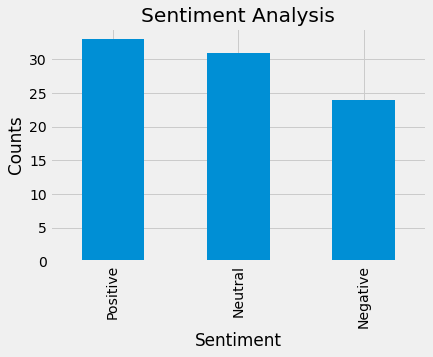

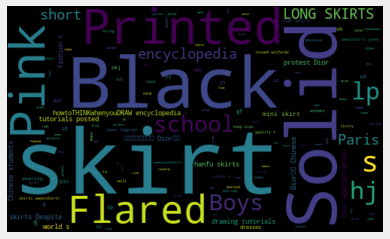

In [86]:
import tweepy
# import smtplib
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
from wordcloud import WordCloud
import pandas as pd
import smtplib
from email.message import  EmailMessage


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

text1 = input("enter the subject")
tweet_data = api_connect.search_tweets(text1,count=100)
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
print(df)
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantxt)
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
# function to get analysis
def getAnalysis(x): #polarity
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# plot the graph between Subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

#plotting of wordcloud
wrds=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(wrds)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()
df.to_csv('sentimental1_analysis.csv', header=False, index=False)

In [87]:
dfd=pd.read_csv('skirts_csv_final.csv')
dfd.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,6,http://flipkart.com/montrez-solid-women-straig...,6,Women Solid Straight Dark Blue Skirt,4.1,6718,655,i love this product small sizethank you flipka...,3.4370,0.178536
1,9,http://flipkart.com/montrez-solid-women-straig...,9,Women Solid Straight Dark Blue Skirt,4.1,6718,655,i love this product small sizethank you flipka...,3.4370,0.178536
2,89,http://flipkart.com/montrez-solid-women-straig...,89,Women Solid Straight Dark Blue Skirt,4.1,6718,655,i love this product small sizethank you flipka...,3.4370,0.178536
3,118,http://flipkart.com/krishika-printed-women-fla...,118,Women Printed Flared Maroon Skirt,3.9,6204,714,its very nice i liked it good quality and colo...,3.6510,0.177821
4,33,http://flipkart.com/kotty-solid-women-straight...,33,Women Solid Straight Dark Blue Skirt,4.2,4699,545,amazing 🥳🍭 as expected 😍😍😍thank u so much flip...,4.8116,0.161588


In [88]:
dfd=dfd.dropna()
dfd=dfd.reset_index(drop=True)

In [89]:
dfd.tail()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
266,177,http://flipkart.com/rajasthani-look-woven-wome...,177,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
267,210,http://flipkart.com/rajasthani-look-woven-wome...,210,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
268,241,http://flipkart.com/rajasthani-look-woven-wome...,241,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
269,267,http://flipkart.com/rajasthani-look-woven-wome...,267,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063
270,302,http://flipkart.com/rajasthani-look-woven-wome...,302,Women Woven Gathered Light Green Skirt,3.7,3,1,superb,0.6249,0.000063


In [90]:
b=""

In [91]:
for i in range(0,len(dfd)):
    b=b+str(dfd['desc'][i])

In [92]:
b

'Women Solid Straight Dark Blue SkirtWomen Solid Straight Dark Blue SkirtWomen Solid Straight Dark Blue SkirtWomen Printed Flared Maroon SkirtWomen Solid Straight Dark Blue SkirtWomen Printed Flared Pink SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Red SkirtWomen Solid Pleated Grey SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Yellow SkirtWomen Solid Pleated Green SkirtWomen Solid Pleated Dark Blue SkirtWomen Solid A-line Light Blue SkirtWomen Solid A-line Blue SkirtWomen Solid A-line Blue SkirtWomen Solid A-line Dark Blue SkirtWomen Solid Pleated Maroon SkirtWomen Solid Pleated Black SkirtWomen Solid Regular Black SkirtWomen Solid Regular Maroon SkirtWomen Solid Pleated Black SkirtWomen Solid Pleated Pink SkirtWomen Solid Pleated Green SkirtWomen Printed Regular Maroon SkirtWomen Solid Flared Black SkirtWomen Solid Flared White SkirtWomen Solid Flared Black SkirtWomen Solid Flared Maroon SkirtWomen Soli

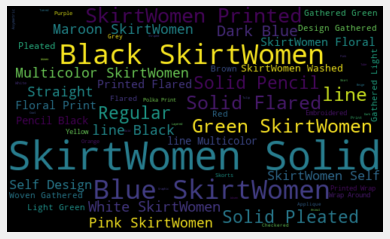

In [56]:
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(b)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

enter the subjectdresses
                                               Tweets
0   Women's Sleeveless Dress\n\nBuy Here : https:/...
1   @Lionsheadrock @benjamincohen The recorded res...
2   Everyone looks the same dresses the same says ...
3   please can these two dresses just one day show...
4   RT @saidsabristi: Les propos raciste indéfenda...
5   'And of course the skimpy white dresses here r...
6   @RescueWombat Urianger. Brain just goes straig...
7   A breezy wrap offers great coverage for summer...
8   @kateStrasdin @V_and_A Thank you always tweeti...
9   RT @PRADAXBBY: obsessed with backless dresses ...
10  @GBNEWS FGS can you just stop with all this cr...
11  RT @KirstenLeigh321: @FunnyPolitical2 As a cli...
12  RT @PRADAXBBY: obsessed with backless dresses ...
13  RT @feministhoe_: My aunt came to my house and...
14  RT @PRADAXBBY: obsessed with backless dresses ...
15  Modern Chic Sunglasses...\nVisit: https://t.co...
16  @JazzerciseDemon I would say it comes down to ...
17 

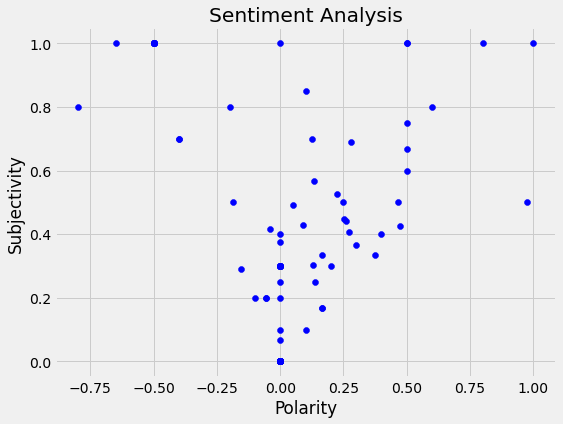

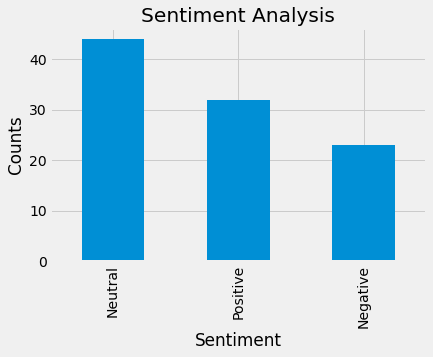

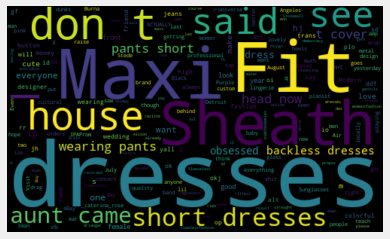

In [161]:
import tweepy
# import smtplib
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import re
from wordcloud import WordCloud
import pandas as pd
import smtplib
from email.message import  EmailMessage


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
consumer_key = "zvghpJLaBrHdUqloJDlcV7rum"
consumer_sec = "BKvbGtBlMBUPn9ONG1x7LrYkLclA2sRXT5G4KuGZiPgGlnNq2R"
access_token = "1383703955218132994-lz4OavJh4DLABqVo4SBnjzqSWw72vE"
access_token_sec = "oj254ngv1FjYnVveQOL1SQuRxOtR88xkROqaXSm8zalPQ"
# create an authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_sec)
# set the access token and access token secret
auth.set_access_token(access_token, access_token_sec)
# create an API object
api_connect = tweepy.API(auth)

text1 = input("enter the subject")
tweet_data = api_connect.search_tweets(text1,count=100)
df = pd.DataFrame([tweet.text for tweet in tweet_data], columns=['Tweets'])
print(df)
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantxt)
# function to get subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
# function to get analysis
def getAnalysis(x): #polarity
    if (x < 0):
        return 'Negative'
    elif (x == 0):
        return 'Neutral'
    elif (x > 0):
        return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# plot the graph between Subjectivity and polarity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
 plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

#plotting of wordcloud
wrds=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(wrds)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()
df.to_csv('sentimental1_analysis2.csv', header=False, index=False)

In [162]:
ddd=pd.read_csv('dresses_csv_final.csv')
ddd.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,2,http://flipkart.com/aayu-women-fit-flare-multi...,2,Women Fit and Flare Multicolor Dress,4.0,106335,15304,so comfortable dress in pregnancy time very d...,1.8009,0.253933
1,173,http://flipkart.com/kannan-women-maxi-multicol...,173,Women Maxi Multicolor Dress,3.8,35444,6065,in love wid thz product😍 perfect one ok ok pro...,3.0844,0.109535
2,17,http://flipkart.com/sheetal-associates-women-m...,17,Women Maxi Pink Dress,4.0,39659,5395,perfect fit good product really nice one very ...,2.2165,0.099607
3,14,http://flipkart.com/daevish-women-skater-black...,14,Women Skater Black Dress,4.3,26746,3706,one of my bestest purchase from flipkart 👌👌 lo...,2.8227,0.077442
4,123,http://flipkart.com/daevish-women-a-line-black...,123,Women A-line Black Dress,4.3,27104,5092,perfect❤️🔥 nice dress such a beautiful dress,1.3391,0.067440


In [163]:
ddd=ddd.dropna()
ddd=ddd.reset_index(drop=True)

In [164]:
ddd.tail()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
322,321,http://flipkart.com/urbanic-women-a-line-white...,321,Women A-line White Dress,4.2,19,1,fabric is good dress is comfortable and pretty❤,1.7636,0.000038
323,226,http://flipkart.com/urbanic-women-gown-brown-d...,226,Women Gown Brown Dress,3.8,19,1,good,0.4404,0.000031
324,260,http://flipkart.com/urbanic-women-a-line-black...,260,Women A-line Black Dress,3.6,12,2,it was very preety dress one of the best dress...,1.6767,0.000027
325,325,http://flipkart.com/roadster-women-a-line-pink...,325,Women A-line Pink Dress,4.7,12,1,vry nyc,0.0000,0.000023
326,275,http://flipkart.com/sheetal-associates-women-b...,275,Women Bodycon Blue Dress,4.0,7,1,beautiful dress at this price,0.5994,0.000013


In [165]:
c=""

In [166]:
for i in range(0,len(ddd)):
    c=c+str(ddd['desc'][i])

In [167]:
c

'Women Fit and Flare Multicolor DressWomen Maxi Multicolor DressWomen Maxi Pink DressWomen Skater Black DressWomen A-line Black DressWomen Maxi White, Maroon, Black DressWomen Maxi Green DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Fit and Flare Purple DressWomen Maxi White, Beige DressWomen Maxi White, Beige DressWomen Fit and Flare Yellow Dress With MaskWomen Maxi Maroon, White DressWomen Maxi Black, White DressWomen Maxi Pink DressWomen Bodycon Blue DressWomen Fit and Flare Multicolor DressWomen Fit and Flare Black DressWomen Maxi Maroon DressWomen Maxi Black DressWomen Maxi Black DressWomen Maxi Blue DressWomen Fit and Flare Blue DressWomen Bodycon Black, Maroon, White DressWomen Bodycon Black DressWomen Wrap Maroon DressWomen Gathe

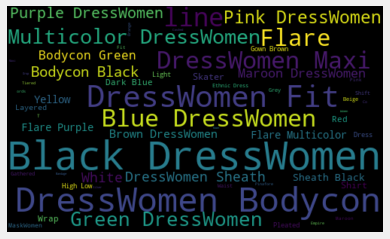

In [168]:
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(c)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
class Solution:
   def solve(self, s0, s1):
      s0 = s0.lower()
      s1 = s1.lower()
      s0List = s0.split(" ")
      s1List = s1.split(" ")
      return list(set(s0List)&set(s1List))
       
ob = Solution()
pol1=ob.solve(wrds,a)

In [49]:
pol1

['solid',
 'striped',
 'beige',
 'men',
 'or',
 'blue',
 'pink',
 'crew',
 'black',
 'polo',
 'color',
 'round',
 'neck',
 'orange',
 'green',
 'collar',
 't-shirt',
 '2',
 'printed',
 'v',
 'of',
 'white',
 'scoop',
 'print']

In [50]:
pol1.remove("or")
pol1.remove("men")
pol1.remove("2")
pol1.remove("v")
pol1.remove("of")
pol1.remove("t-shirt")

In [51]:
pol1

['solid',
 'striped',
 'beige',
 'blue',
 'pink',
 'crew',
 'black',
 'polo',
 'color',
 'round',
 'neck',
 'orange',
 'green',
 'collar',
 'printed',
 'white',
 'scoop',
 'print']

In [52]:
dff.head()

,Unnamed: 0,URL,id,desc,stars,num_ratings,num_reviews,reviews,vader_score,final_score
0,9.0,http://flipkart.com/helmont-color-block-men-ho...,9.0,"Color Block Men Hooded Neck Red, Black T-Shirt",4.0,301659.0,35479.0,nice nyc material 👌 awesome dress and good qua...,2.2165,0.303391
1,81.0,http://flipkart.com/fastcolors-solid-men-round...,81.0,Solid Men Round Neck Brown T-Shirt,4.0,163245.0,18182.0,looking good nice nice dress,1.2834,0.136050
2,159.0,http://flipkart.com/roden-striped-men-round-ne...,159.0,Striped Men Round Neck Yellow T-Shirt,4.0,78734.0,8405.0,best h nice t shart i really like it is too ...,3.2104,0.088638
3,362.0,http://flipkart.com/allen-solly-solid-men-polo...,362.0,Solid Men Polo Neck Green T-Shirt,4.2,86977.0,8030.0,nice good one amazing product in perfect prize,2.5303,0.086743
4,374.0,http://flipkart.com/fastcolors-solid-men-round...,374.0,Solid Men Round Neck Multicolor T-Shirt,3.9,70993.0,8765.0,nice one👌 nice product i impressed perfect,2.6213,0.076833


In [53]:
iu=0
my_dict = {"tag":[],"Score":[]}
for i in range(0,len(pol1)):
    for j in range(0,len(dff)):
        if pol1[i] in dff['desc'][j].lower():
            iu=iu+1
    my_dict["tag"].append(pol1[i])
    my_dict["Score"].append(iu)
    iu=0

In [54]:
my_dict

{'tag': ['solid',
  'striped',
  'beige',
  'blue',
  'pink',
  'crew',
  'black',
  'polo',
  'color',
  'round',
  'neck',
  'orange',
  'green',
  'collar',
  'printed',
  'white',
  'scoop',
  'print'],
 'Score': [79, 34, 1, 42, 7, 3, 57, 62, 48, 108, 197, 6, 30, 8, 47, 28, 1, 50]}

In [57]:
new = pd.DataFrame.from_dict(my_dict)

In [58]:
new

,tag,Score
0,solid,79
1,striped,34
2,beige,1
3,blue,42
4,pink,7
5,crew,3
6,black,57
7,polo,62
8,color,48
9,round,108


In [63]:
new=new.sort_values('Score', ascending=False)

In [64]:
new.head()

,tag,Score
10,neck,197
9,round,108
0,solid,79
7,polo,62
6,black,57


In [65]:
opl=[]

In [67]:
for i in range(0,6):
    for j in range(len(dff)):
        if new['tag'][i] in dff['URL'][j]:
            opl.append(dff['URL'][j])
            break

In [21]:
opl

['http://flipkart.com/fastcolors-solid-men-round-neck-brown-t-shirt/p/itm206d93684e003?pid=TSHG4BM2SXFGQPPB&lid=LSTTSHG4BM2SXFGQPPBYCIS5T&marketplace=FLIPKART&store=clo%2Fash%2Fank%2Fedy&srno=b_3_86&otracker=browse&fm=organic&iid=09a0a7e6-7da8-487f-8f7b-107f233c6e8e.TSHG4BM2SXFGQPPB.SEARCH&ppt=None&ppn=None&ssid=qc4bqvncjk0000001658749324876',
 'http://flipkart.com/roden-striped-men-round-neck-yellow-t-shirt/p/itm3744da595cc60?pid=TSHFKAZFH6ETFP69&lid=LSTTSHFKAZFH6ETFP69UPZJQK&marketplace=FLIPKART&store=clo%2Fash%2Fank%2Fedy&srno=b_5_165&otracker=browse&fm=organic&iid=5f36eec8-b866-4818-acfd-fc96b59362fd.TSHFKAZFH6ETFP69.SEARCH&ppt=None&ppn=None&ssid=wi9d7ehkmo0000001658749327073',
 'http://flipkart.com/try-color-block-men-round-neck-maroon-beige-t-shirt/p/itm1e9001f0244a3?pid=TSHFGMGKGHE3SCTR&lid=LSTTSHFGMGKGHE3SCTRBE8PK1&marketplace=FLIPKART&store=clo%2Fash%2Fank%2Fedy&srno=b_10_374&otracker=browse&fm=organic&iid=1a3c65da-ab4a-4f52-bda8-58dd5a54d54b.TSHFGMGKGHE3SCTR.SEARCH&ppt=None&p

In [69]:
new1 = pd.DataFrame(opl)

In [70]:
new1

,0
0,http://flipkart.com/fastcolors-solid-men-round...
1,http://flipkart.com/roden-striped-men-round-ne...
2,http://flipkart.com/try-color-block-men-round-...
3,http://flipkart.com/reya-striped-men-round-nec...
4,http://flipkart.com/maniac-color-block-men-rou...
5,http://flipkart.com/hrx-hrithik-roshan-solid-m...


In [74]:
new = new[0:6]

In [77]:
new

,tag,Score
10,neck,197
9,round,108
0,solid,79
7,polo,62
6,black,57
17,print,50


In [82]:
new=new.reset_index(drop=True)

In [83]:
result = pd.concat([new, new1], axis=1, join='inner')
display(result)

,tag,Score,0
0,neck,197,http://flipkart.com/fastcolors-solid-men-round...
1,round,108,http://flipkart.com/roden-striped-men-round-ne...
2,solid,79,http://flipkart.com/try-color-block-men-round-...
3,polo,62,http://flipkart.com/reya-striped-men-round-nec...
4,black,57,http://flipkart.com/maniac-color-block-men-rou...
5,print,50,http://flipkart.com/hrx-hrithik-roshan-solid-m...


In [84]:
result.to_csv('tshirts.csv')

In [121]:
class Solution:
   def solve(self, s0, s1):
      s0 = s0.lower()
      s1 = s1.lower()
      s0List = s0.split(" ")
      s1List = s1.split(" ")
      return list(set(s0List)&set(s1List))
       
ob = Solution()
pol2=ob.solve(wrds,b)

In [122]:
pol2

['floral',
 'red',
 'pink',
 'black',
 'dark',
 'flared',
 'solid',
 'pencil',
 'pleated',
 'straight',
 'skirt',
 'women',
 'brown',
 'printed']

In [123]:
pol2.remove('skirt')
pol2.remove('women')

In [124]:
pol2

['floral',
 'red',
 'pink',
 'black',
 'dark',
 'flared',
 'solid',
 'pencil',
 'pleated',
 'straight',
 'brown',
 'printed']

In [125]:
iu=0
my_dict = {"tag":[],"Score":[]}
for i in range(0,len(pol2)):
    for j in range(0,len(dfd)):
        if pol2[i] in dfd['desc'][j].lower():
            iu=iu+1
    my_dict["tag"].append(pol2[i])
    my_dict["Score"].append(iu)
    iu=0

In [126]:
my_dict

{'tag': ['floral',
  'red',
  'pink',
  'black',
  'dark',
  'flared',
  'solid',
  'pencil',
  'pleated',
  'straight',
  'brown',
  'printed'],
 'Score': [15, 93, 18, 71, 20, 55, 164, 31, 37, 18, 9, 35]}

In [127]:
new = pd.DataFrame.from_dict(my_dict)

In [128]:
new

,tag,Score
0,floral,15
1,red,93
2,pink,18
3,black,71
4,dark,20
5,flared,55
6,solid,164
7,pencil,31
8,pleated,37
9,straight,18


In [136]:
new=new.sort_values('Score', ascending=False)

In [137]:
new=new.reset_index(drop=True)

In [138]:
new.head()

,tag,Score
0,solid,164
1,red,93
2,black,71
3,flared,55
4,pleated,37


In [152]:
opl=[]

In [153]:
for i in range(0,6):
    for j in range(len(dfd)):
        if new['tag'][i] in dfd['URL'][j]:
             if dfd['URL'][j] not in opl:
                    opl.append(dfd['URL'][j])
                    break

In [154]:
opl

['http://flipkart.com/montrez-solid-women-straight-dark-blue-skirt/p/itm918546888c1f2?pid=SKIGFHMYPMAR6DYH&lid=LSTSKIGFHMYPMAR6DYHPXXFVJ&marketplace=FLIPKART&store=clo%2Fvua%2Fiku%2Fw5t&srno=b_1_7&otracker=browse&fm=organic&iid=2d939601-ec13-4558-93c7-7dbe65e7c6c7.SKIGFHMYPMAR6DYH.SEARCH&ppt=None&ppn=None&ssid=il2xkxlcsg0000001658754628910',
 'http://flipkart.com/krishika-printed-women-flared-maroon-skirt/p/itmfda3283270e43?pid=SKIFT57NCPGY8WZC&lid=LSTSKIFT57NCPGY8WZCUFRSSN&marketplace=FLIPKART&store=clo%2Fvua%2Fiku%2Fw5t&srno=b_4_150&otracker=browse&fm=organic&iid=c2e8f37a-c917-4619-a1ec-36a3b794b8a7.SKIFT57NCPGY8WZC.SEARCH&ppt=None&ppn=None&ssid=7rw6oula680000001658754631703',
 'http://flipkart.com/dl-fashion-solid-women-pleated-black-skirt/p/itm845f404d52860?pid=SKIFVJ3VFYAF2FWF&lid=LSTSKIFVJ3VFYAF2FWFR5XU8G&marketplace=FLIPKART&store=clo%2Fvua%2Fiku%2Fw5t&srno=b_8_317&otracker=browse&fm=organic&iid=23d51186-d045-46b1-81f9-198d2c6b7bee.SKIFVJ3VFYAF2FWF.SEARCH&ppt=None&ppn=None&ssid=

In [155]:
new1 = pd.DataFrame(opl)

In [156]:
new1

,0
0,http://flipkart.com/montrez-solid-women-straig...
1,http://flipkart.com/krishika-printed-women-fla...
2,http://flipkart.com/dl-fashion-solid-women-ple...
3,http://flipkart.com/fashioncutz-printed-women-...
4,http://flipkart.com/uptownie-lite-solid-women-...
5,http://flipkart.com/vikalps-printed-women-regu...


In [157]:
new = new[0:6]

In [158]:
new=new.reset_index(drop=True)

In [159]:
result = pd.concat([new, new1], axis=1, join='inner')
display(result)

,tag,Score,0
0,solid,164,http://flipkart.com/montrez-solid-women-straig...
1,red,93,http://flipkart.com/krishika-printed-women-fla...
2,black,71,http://flipkart.com/dl-fashion-solid-women-ple...
3,flared,55,http://flipkart.com/fashioncutz-printed-women-...
4,pleated,37,http://flipkart.com/uptownie-lite-solid-women-...
5,printed,35,http://flipkart.com/vikalps-printed-women-regu...


In [160]:
result.to_csv('skirts.csv')

In [169]:
class Solution:
   def solve(self, s0, s1):
      s0 = s0.lower()
      s1 = s1.lower()
      s0List = s0.split(" ")
      s1List = s1.split(" ")
      return list(set(s0List)&set(s1List))
       
ob = Solution()
pol3=ob.solve(wrds,c)

In [171]:
pol3

['shirt',
 'blue',
 'high',
 'pink',
 'red',
 'wrap',
 'black',
 'fit',
 'purple',
 'dress',
 'gown',
 'with',
 'and',
 'sheath',
 'low',
 'white',
 'maxi']

In [188]:
pol3.remove('dress')
pol3.remove('and')


In [189]:
iu=0
my_dict = {"tag":[],"Score":[]}
for i in range(0,len(pol3)):
    for j in range(0,len(ddd)):
        if pol3[i] in ddd['desc'][j].lower():
            iu=iu+1
    my_dict["tag"].append(pol3[i])
    my_dict["Score"].append(iu)
    iu=0

In [190]:
my_dict

{'tag': ['shirt',
  'blue',
  'high',
  'pink',
  'red',
  'wrap',
  'black',
  'fit',
  'purple',
  'gown',
  'with',
  'sheath',
  'low',
  'white',
  'maxi'],
 'Score': [10, 44, 6, 31, 21, 9, 85, 64, 28, 7, 5, 23, 18, 21, 42]}

In [191]:
new = pd.DataFrame.from_dict(my_dict)

In [192]:
new

,tag,Score
0,shirt,10
1,blue,44
2,high,6
3,pink,31
4,red,21
5,wrap,9
6,black,85
7,fit,64
8,purple,28
9,gown,7


In [193]:
new=new.sort_values('Score', ascending=False)

In [194]:
new=new.reset_index(drop=True)

In [195]:
new.head()

,tag,Score
0,black,85
1,fit,64
2,blue,44
3,maxi,42
4,pink,31


In [196]:
opl=[]

In [197]:
for i in range(0,6):
    for j in range(len(ddd)):
        if new['tag'][i] in ddd['URL'][j]:
             if ddd['URL'][j] not in opl:
                    opl.append(ddd['URL'][j])
                    break

In [198]:
opl

['http://flipkart.com/daevish-women-skater-black-dress/p/itme6983dab1e838?pid=DREFXCHTHDP7FG3C&lid=LSTDREFXCHTHDP7FG3CYGLEXF&marketplace=FLIPKART&store=clo%2Fodx%2Fmaj%2Fjhy&srno=b_1_16&otracker=browse&fm=organic&iid=9f4db607-5fab-4c8e-8f54-49bcaf7d2f85.DREFXCHTHDP7FG3C.SEARCH&ppt=None&ppn=None&ssid=935ax4ah8g0000001658756734118',
 'http://flipkart.com/aayu-women-fit-flare-multicolor-dress/p/itmfbz6zajmnsthr?pid=DREFBYMF96XFYZBJ&lid=LSTDREFBYMF96XFYZBJUGRSL8&marketplace=FLIPKART&store=clo%2Fodx%2Fmaj%2Fjhy&srno=b_1_3&otracker=browse&fm=organic&iid=9f4db607-5fab-4c8e-8f54-49bcaf7d2f85.DREFBYMF96XFYZBJ.SEARCH&ppt=None&ppn=None&ssid=935ax4ah8g0000001658756734118',
 'http://flipkart.com/sheetal-associates-women-bodycon-blue-dress/p/itm2bd5351d35b2c?pid=DREG49M2XKYBVDMF&lid=LSTDREG49M2XKYBVDMFT8XKLL&marketplace=FLIPKART&store=clo%2Fodx%2Fmaj%2Fjhy&srno=b_3_89&otracker=browse&fm=organic&iid=518e877b-2c85-48a1-b683-3dc7f39eb17a.DREG49M2XKYBVDMF.SEARCH&ppt=None&ppn=None&ssid=3253kt4y0000000016

In [199]:
new1 = pd.DataFrame(opl)

In [200]:
result = pd.concat([new, new1], axis=1, join='inner')
display(result)

,tag,Score,0
0,black,85,http://flipkart.com/daevish-women-skater-black...
1,fit,64,http://flipkart.com/aayu-women-fit-flare-multi...
2,blue,44,http://flipkart.com/sheetal-associates-women-b...
3,maxi,42,http://flipkart.com/kannan-women-maxi-multicol...
4,pink,31,http://flipkart.com/sheetal-associates-women-m...
5,purple,28,http://flipkart.com/iqraar-women-fit-flare-pur...


In [ ]:
result.to_csv('dresses.csv')